In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///data/birds_db")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['birdmetadata', 'birds']

In [7]:
metadata = Base.classes.birdmetadata
birds = Base.classes.birds

In [9]:
#Thanks chat GPT
from sqlalchemy.orm import sessionmaker

# Create a sessionmaker object
Session = sessionmaker(bind=engine)

# Create a session
session = Session()

In [ ]:
# Design a query to retrieve the last 12 months of observation data and plot the results. 

In [12]:
# Starting from the most recent data point in the database. 
recent_date = session.query(birds.OBSERVATION_DATE).order_by(birds.OBSERVATION_DATE.desc()).first()
print(recent_date)

('2023-02-28',)


In [13]:
# Calculate the date one year from the last date in data set.
one_year = dt.date(2023, 2, 28) - dt.timedelta(days=365)
print(one_year)

2022-02-28


In [16]:
# Perform a query to retrieve the data and observations

obs = session.query(birds.OBSERVATION_DATE, birds.OBSERVATION_COUNT).\
    filter(birds.OBSERVATION_DATE > one_year).\
    order_by(birds.OBSERVATION_DATE).all()

In [30]:
# Save the query results as a Pandas DataFrame and set the index to the date column
obs_df = pd.DataFrame(obs)
obs_df.set_index('OBSERVATION_DATE')
obs_df

,OBSERVATION_DATE,OBSERVATION_COUNT
0,2022-03-01,1.0
1,2022-03-01,1.0
2,2022-03-01,2.0
3,2022-03-01,1.0
4,2022-03-01,5.0
...,...,...
106688,2023-02-28,1.0
106689,2023-02-28,1.0
106690,2023-02-28,1.0
106691,2023-02-28,2.0


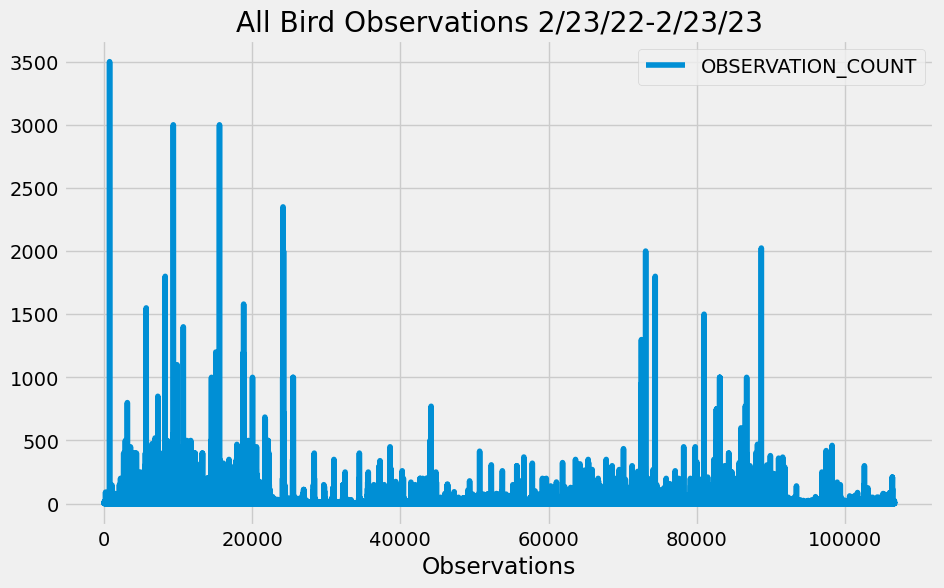

In [39]:
ax = obs_df.plot(figsize=(10,6))
ax.set_ylabel("")
ax.set_xlabel("Observations")
ax.set_title("All Bird Observations 2/23/22-2/23/23")
plt.show()